# TAREA 9

* Shu-yi Wong Baxter
* Sebastian Perez Berrios
* Mathias Cáceres Bustamante

#**Librerias**

In [ ]:
import csv
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
%matplotlib inline
import pandas_profiling
from pandas_profiling import ProfileReport
from sklearn import preprocessing 
from sklearn import cluster
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree
from sklearn.tree import export_graphviz
from sklearn.tree import export_text
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import ParameterGrid
from sklearn.inspection import permutation_importance
import multiprocessing
from sklearn.ensemble import AdaBoostRegressor
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import precision_score
from sklearn import metrics
from sklearn import svm
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn import linear_model
from sklearn.model_selection import cross_val_predict

#**Lectura archivos**

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')
path = '/content/drive/My Drive/Mineria de datos(Modelo)'

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
datos=pd.read_csv("/content/drive/My Drive/Mineria de datos(Modelo)/avance 5.5.csv", sep=';')

#**Datos originales**

In [ ]:
datos

,incident_id,date,month,day,state,city_or_county,address,n_killed,n_injured,congressional_district,gun_stolen,gun_type,incident_characteristics,location_description,latitude,longitude,n_guns_involved,notes,participant_age_group,participant_gender,avg_age
0,461105.0,01-01-2013,1.0,2.0,39.0,Mckeesport,1506 Versailles Avenue and Coursin Street,0.0,4.0,14.0,2,5,Shot - Wounded/Injured|Mass Shooting (4+ victi...,NaN,403467.0,-798559.0,0,Julian Sims under investigation: Four Shot and...,0,2,2.000000e+01
1,460726.0,01-01-2013,1.0,2.0,4.0,Hawthorne,13500 block of Cerise Avenue,1.0,3.0,43.0,2,5,"Shot - Wounded/Injured|Shot - Dead (murder, ac...",NaN,33909.0,-118333.0,0,Four Shot; One Killed; Unidentified shooter in...,0,1,2.000000e+01
2,478855.0,01-01-2013,1.0,2.0,36.0,Lorain,1776 East 28th Street,1.0,3.0,9.0,2,5,"Shot - Wounded/Injured|Shot - Dead (murder, ac...",Cotton Club,414455.0,-821377.0,2,-,0,1,3.075000e+03
3,478925.0,05-01-2013,1.0,6.0,7.0,Aurora,16000 block of East Ithaca Place,4.0,0.0,6.0,2,5,"Shot - Dead (murder, accidental, suicide)|Offi...",NaN,396518.0,-104802.0,0,-,0,2,3.933333e+09
4,478959.0,07-01-2013,1.0,1.0,5.0,Greensboro,307 Mourning Dove Terrace,2.0,2.0,6.0,2,1,"Shot - Wounded/Injured|Shot - Dead (murder, ac...",NaN,36114.0,-799569.0,2,Two firearms recovered. (Attempted) murder sui...,5,2,3.125000e+03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239563,1083142.0,31-03-2018,3.0,6.0,21.0,Rayne,North Riceland Road and Highway 90,0.0,0.0,NaN,2,5,Shots Fired - No Injuries,NaN,NaN,NaN,1,-,0,0,2.500000e+01
239564,1083139.0,31-03-2018,3.0,6.0,21.0,Natchitoches,247 Keyser Ave,1.0,0.0,4.0,2,5,"Shot - Dead (murder, accidental, suicide)|Inst...",Shop Rite,317537.0,-930836.0,1,-,0,1,2.100000e+01
239565,1083151.0,31-03-2018,3.0,6.0,21.0,Gretna,1300 block of Cook Street,0.0,1.0,2.0,2,5,Shot - Wounded/Injured,NaN,299239.0,-900442.0,1,-,0,1,2.100000e+01
239566,1082514.0,31-03-2018,3.0,6.0,42.0,Houston,12630 Ashford Point Dr,1.0,0.0,9.0,2,5,"Shot - Dead (murder, accidental, suicide)",Vanderbilt Court apartments,297201.0,-95611.0,1,"Vic was found shot to death in car on 4/1/18, ...",0,1,4.200000e+01


In [ ]:
datos.describe()

,incident_id,month,day,state,n_killed,n_injured,congressional_district,gun_stolen,gun_type,latitude,longitude,n_guns_involved,participant_age_group,participant_gender,avg_age
count,2.395620e+05,239560.000000,239560.000000,239561.000000,239560.000000,239560.000000,227617.000000,239568.000000,239568.000000,231637.000000,231637.000000,239568.000000,239568.000000,239568.000000,2.375050e+05
mean,5.597832e+05,6.351866,4.059050,22.878666,0.252308,0.494027,8.002276,1.956605,4.562379,341135.890488,-661803.637899,0.803263,1.545536,1.384183,6.577790e+07
std,3.107617e+05,3.447823,2.023221,14.107485,0.521819,0.730013,8.481982,0.232794,1.803062,113729.002089,324951.427771,3.642450,2.737558,0.785275,4.501830e+08
min,9.211400e+04,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,28.000000,-999872.000000,0.000000,0.000000,0.000000,0.000000e+00
25%,3.089170e+05,3.000000,2.000000,12.000000,0.000000,0.000000,2.000000,2.000000,5.000000,324553.000000,-876735.000000,0.000000,0.000000,1.000000,0.000000e+00
50%,5.437510e+05,6.000000,4.000000,21.000000,0.000000,0.000000,5.000000,2.000000,5.000000,374268.000000,-808722.000000,1.000000,0.000000,1.000000,2.100000e+01
75%,8.173125e+05,9.000000,6.000000,36.000000,0.000000,1.000000,10.000000,2.000000,5.000000,409968.000000,-710259.000000,1.000000,2.000000,2.000000,3.500000e+01
max,3.982186e+07,12.000000,7.000000,49.000000,50.000000,53.000000,53.000000,2.000000,16.000000,713368.000000,974331.000000,400.000000,7.000000,3.000000,9.666667e+09


In [ ]:
#datos.loc[:,'FECHA'] = pd.to_datetime(datos.date.values, format='%d-%m-%Y')

In [ ]:
#datos.FECHA.values

In [ ]:
#Para saber cuantos valores nulos hay en el dataset
datos.isnull().sum()

incident_id                      6
date                             8
month                            8
day                              8
state                            7
city_or_county                   6
address                      16497
n_killed                         8
n_injured                        8
congressional_district       11951
gun_stolen                       0
gun_type                         0
incident_characteristics       334
location_description        197482
latitude                      7931
longitude                     7931
n_guns_involved                  0
notes                            0
participant_age_group            0
participant_gender               0
avg_age                       2063
dtype: int64

#**Modificacion de datos**

In [ ]:
#Elimina los nulos de date que son pocos y eso hace que se eliminen los nulos pequeños que
# estan en la misma fila y quedan las columnas que se usaran sin nulos
datos.drop(datos[datos.date.isnull()].index, inplace = True) #Ojo aqui, el inplace true los elimina del dataset original, no hace una copia

In [ ]:
##Datos orginales post pequeña limpieza
datos2 = datos.drop_duplicates()
datos2 = datos.drop(['incident_id','date','address','incident_characteristics','location_description','latitude','longitude','notes','city_or_county','congressional_district'], axis=1) #Eliminar columnas correlacionales a global_sales
datos2.loc[(datos2.avg_age>=0.0)&(datos2.avg_age<18.0) ,'avg_age']=0;
datos2.loc[(datos2.avg_age>=18.0)&(datos2.avg_age<25.0) ,'avg_age']=1;
datos2.loc[(datos2.avg_age>=25.0)&(datos2.avg_age<45.0) ,'avg_age']=2;
datos2.loc[(datos2.avg_age>=45.0)&(datos2.avg_age<70.0) ,'avg_age']=3;
datos2.loc[(datos2.avg_age>=70.0) ,'avg_age']=4;

datos2.loc[(datos2.n_killed==0.0)&(datos2.n_injured==0.0) ,'heridos']=0;
datos2.loc[(datos2.n_killed>=1.0)&(datos2.n_injured==0.0) ,'heridos']=1;
datos2.loc[(datos2.n_killed==0.0)&(datos2.n_injured>=1.0) ,'heridos']=1;
datos2.loc[(datos2.n_killed>=1.0)&(datos2.n_injured>=1.0) ,'heridos']=1;

datos2.loc[(datos2.state==7.0)|(datos2.state==9.0)|(datos2.state==12.0)|(datos2.state==15.0)|(datos2.state==18.0)|(datos2.state==23.0)|(datos2.state==24.0)|(datos2.state==25.0)|(datos2.state==33.0)|(datos2.state==35.0)|(datos2.state==41.0)|(datos2.state==45.0)|(datos2.state==47.0),'state2']=0;
datos2.loc[(datos2.state==3.0)|(datos2.state==8.0)|(datos2.state==16.0)|(datos2.state==20.0)|(datos2.state==26.0)|(datos2.state==27.0)|(datos2.state==31.0)|(datos2.state==32.0)|(datos2.state==39.0)|(datos2.state==44.0)|(datos2.state==50.0),'state2']=1;
datos2.loc[(datos2.state==0.0)|(datos2.state==1.0)|(datos2.state==4.0)|(datos2.state==6.0)|(datos2.state==10.0)|(datos2.state==11.0)|(datos2.state==13.0)|(datos2.state==14.0)|(datos2.state==17.0)|(datos2.state==19.0)|(datos2.state==21.0)|(datos2.state==22.0)|(datos2.state==28.0)|(datos2.state==29.0)|(datos2.state==34.0)|(datos2.state==37.0)|(datos2.state==38.0)|(datos2.state==40.0)|(datos2.state==42.0)|(datos2.state==46.0)|(datos2.state==48.0)|(datos2.state==49.0),'state2']=2;
datos2.loc[(datos2.state==2.0)|(datos2.state==5.0)|(datos2.state==30.0)|(datos2.state==36.0)|(datos2.state==43.0) ,'state2']=3;

datos2 = datos2.drop(['n_killed', 'n_injured', 'state'], axis=1) #Eliminar columnas correlacionales a global_sales

datos2

,month,day,gun_stolen,gun_type,n_guns_involved,participant_age_group,participant_gender,avg_age,heridos,state2
0,1.0,2.0,2,5,0,0,2,1.0,1.0,1.0
1,1.0,2.0,2,5,0,0,1,1.0,1.0,2.0
2,1.0,2.0,2,5,2,0,1,4.0,1.0,3.0
3,1.0,6.0,2,5,0,0,2,4.0,1.0,0.0
4,1.0,1.0,2,1,2,5,2,4.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...
239563,3.0,6.0,2,5,1,0,0,2.0,0.0,2.0
239564,3.0,6.0,2,5,1,0,1,1.0,1.0,2.0
239565,3.0,6.0,2,5,1,0,1,1.0,1.0,2.0
239566,3.0,6.0,2,5,1,0,1,2.0,1.0,2.0


In [ ]:
datos2.isnull().sum()

month                       0
day                         0
gun_stolen                  0
gun_type                    0
n_guns_involved             0
participant_age_group       0
participant_gender          0
avg_age                  2063
heridos                     0
state2                      0
dtype: int64

In [ ]:
datos2.drop(datos2[datos2.avg_age.isnull()].index, inplace = True)

#**Histogramas**

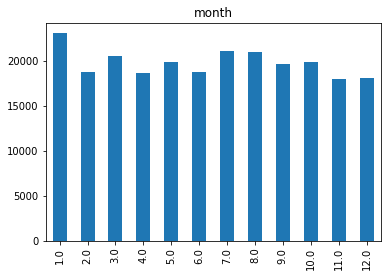

In [ ]:
#Modificacion mes
plot= datos2['month'].value_counts().sort_index(ascending=True).plot(kind='bar',title="month");
plt.show(plot)

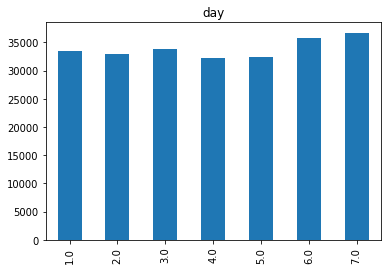

In [ ]:
#Modificacion dia
plot= datos2['day'].value_counts().sort_index(ascending=True).plot(kind='bar',title="day");
plt.show(plot)

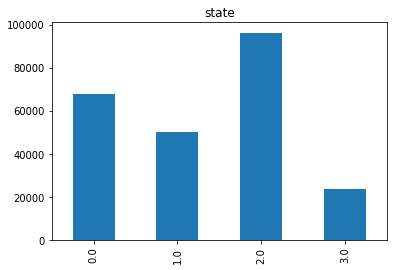

In [ ]:
#Modificacion estado
plot= datos2['state2'].value_counts().sort_index(ascending=True).plot(kind='bar',title="state");
plt.show(plot)

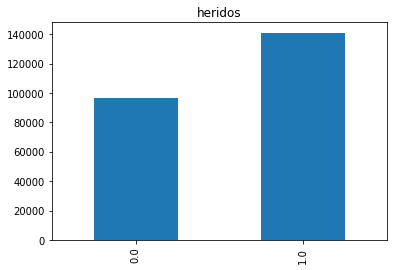

In [ ]:
#Modificacion heridos
plot= datos2['heridos'].value_counts().sort_index(ascending=True).plot(kind='bar',title="heridos");
plt.show(plot)

In [ ]:
#Modificacion ciudad o pueblo
#plot= datos2['city_or_county'].value_counts().plot(kind='bar',title="city_or_county");
#plt.show(plot)
#Modificacion ciudad o pueblo
#plot= datos2['congressinal_district'].value_counts().plot(kind='bar',title="city_or_county");
#plt.show(plot)

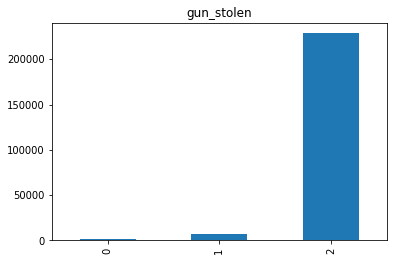

In [ ]:
#Armas robadas
plot= datos2['gun_stolen'].value_counts().sort_index(ascending=True).plot(kind='bar',title="gun_stolen");
plt.show(plot)

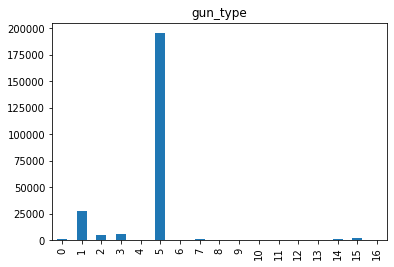

In [ ]:
#Tipo de armas
plot= datos2['gun_type'].value_counts().sort_index(ascending=True).plot(kind='bar',title="gun_type");
plt.show(plot)

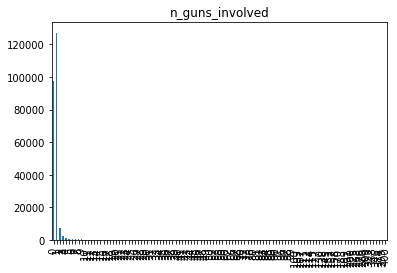

In [ ]:
#N° de armas involucradas
plot= datos2['n_guns_involved'].value_counts().sort_index(ascending=True).plot(kind='bar',title="n_guns_involved");
plt.show(plot)

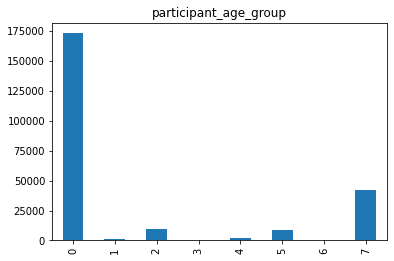

In [ ]:
#Edad del grupo particpante
plot= datos2['participant_age_group'].value_counts().sort_index(ascending=True).plot(kind='bar',title="participant_age_group");
plt.show(plot)

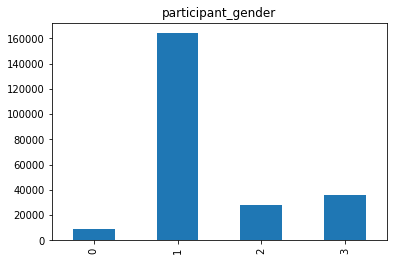

In [ ]:
#Generos de participantes
plot= datos2['participant_gender'].value_counts().sort_index(ascending=True).plot(kind='bar',title="participant_gender");
plt.show(plot)

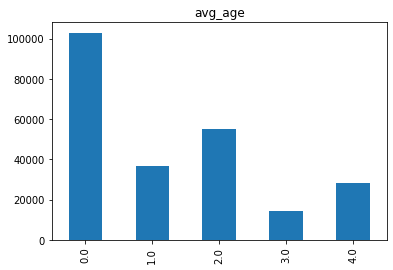

In [ ]:
#Edad promedio
plot= datos2['avg_age'].value_counts().sort_index(ascending=True).plot(kind='bar',title="avg_age");
plt.show(plot)

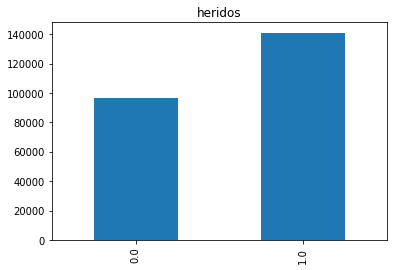

In [ ]:
#Edad promedio
plot= datos2['heridos'].value_counts().sort_index(ascending=True).plot(kind='bar',title="heridos");
plt.show(plot)

#**Boxplots**

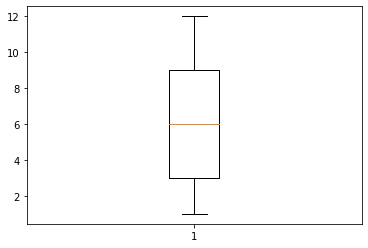

In [ ]:
#Mes
plt.boxplot(datos2['month'])
plt.show()

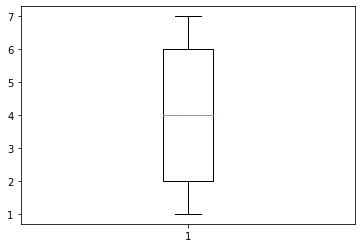

In [ ]:
#Day
plt.boxplot(datos2['day'])
plt.show()

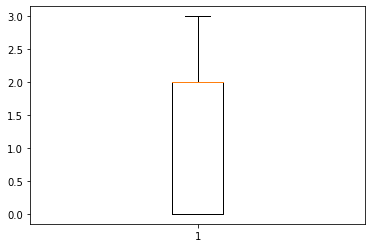

In [ ]:
#Estado
plt.boxplot(datos2['state2'])
plt.show()

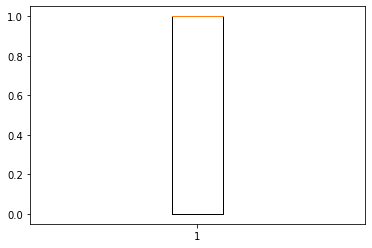

In [ ]:
plt.boxplot(datos2['heridos'])
plt.show()

In [ ]:
#Ciudad o pueblo
#plt.boxplot(datos2['city_or_county'])
#plt.show()

In [ ]:
#Congreso del distrito
#plt.boxplot(datos2['congressional_district'])
#plt.show()

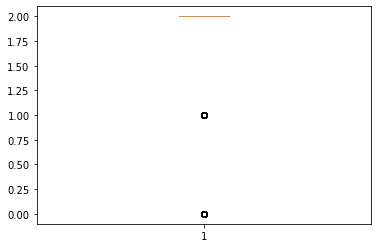

In [ ]:
#Armas robadas
plt.boxplot(datos2['gun_stolen'])
plt.show()

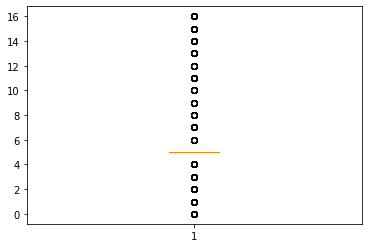

In [ ]:
#Tipo de armas
plt.boxplot(datos2['gun_type'])
plt.show()

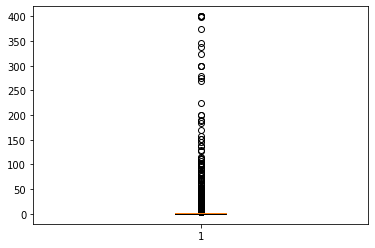

In [ ]:
#Numro de armas envueltas
plt.boxplot(datos2['n_guns_involved'])
plt.show()

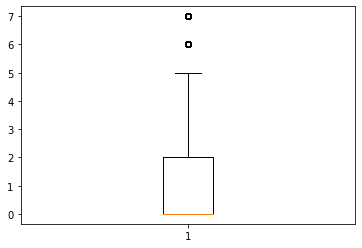

In [ ]:
#Edad del grupo de participantes
plt.boxplot(datos2['participant_age_group'])
plt.show()

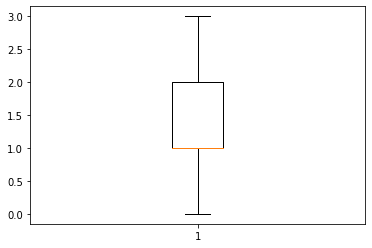

In [ ]:
#Genero de los participantes
plt.boxplot(datos2['participant_gender'])
plt.show()

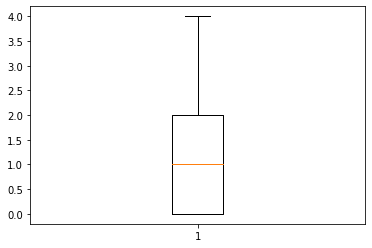

In [ ]:
#Edad promedio participantes
plt.boxplot(datos2['avg_age'])
plt.show()

In [ ]:
datos2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 237497 entries, 0 to 239567
Data columns (total 10 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   month                  237497 non-null  float64
 1   day                    237497 non-null  float64
 2   gun_stolen             237497 non-null  int64  
 3   gun_type               237497 non-null  int64  
 4   n_guns_involved        237497 non-null  int64  
 5   participant_age_group  237497 non-null  int64  
 6   participant_gender     237497 non-null  int64  
 7   avg_age                237497 non-null  float64
 8   heridos                237497 non-null  float64
 9   state2                 237497 non-null  float64
dtypes: float64(5), int64(5)
memory usage: 19.9 MB


In [ ]:
#Decisiones para eliminar outliers**

In [ ]:
#n_killed_v2 = datos2[ (datos2['n_killed'] == 0)].index
#datos2.drop(n_killed_v2, inplace=True)

In [ ]:
#n_killed_v2 = datos2[ (datos2['n_killed'] >= 2)].index
#datos2.drop(n_killed_v2, inplace=True)

In [ ]:
#plot= datos2['n_killed'].value_counts().plot(kind='bar',title="n_killed");
#plt.show(plot)

In [ ]:
#plt.boxplot(datos2['n_killed'])
#plt.show()

In [ ]:
#n_injured_v2 = datos2[datos2['n_injured']==0].index.astype(int)
#datos2.drop(n_injured_v2, inplace=True)

In [ ]:
#n_injured_v2 = datos2[datos2['n_injured']>=2].index.astype(int)
#datos2.drop(n_injured_v2, inplace=True)

In [ ]:
#plot= datos2['n_injured'].value_counts().plot(kind='bar',title="n_injured");
#plt.show(plot)

In [ ]:
#plt.boxplot(datos2['n_injured'])
#plt.show()

In [ ]:
gun_stolen_v2 = datos2[ (datos2['gun_stolen'] == 2)].index.astype(int)
datos2.drop(gun_stolen_v2, inplace=True)

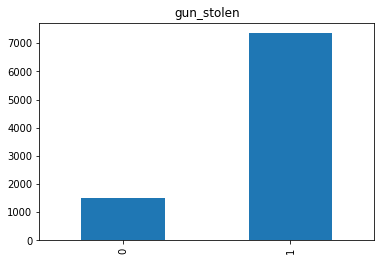

In [ ]:
#0 El arma no era robada, 1 usada era robada
plot= datos2['gun_stolen'].value_counts().sort_index(ascending=True).plot(kind='bar',title="gun_stolen");
plt.show(plot)

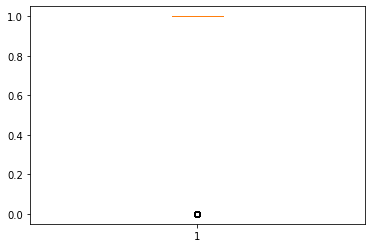

In [ ]:
plt.boxplot(datos2['gun_stolen'])
plt.show()

In [ ]:
datos2['gun_type']=(datos['gun_type'].fillna(0)).astype(int)
datos2.loc[(datos2.gun_type>=6),'gun_type']=4;
gun_type_v2 = datos2[ (datos2['gun_type'] == 5)].index.astype(int)
datos2.drop(gun_type_v2, inplace=True)

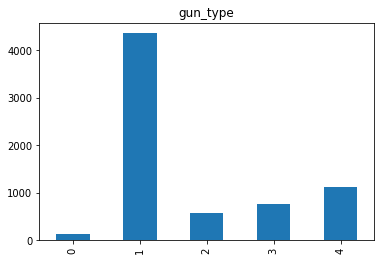

In [ ]:
#0	Gal, 1	Handgun, 2	Shotgun, 3	Rifle, 4	Other
plot= datos2['gun_type'].value_counts().sort_index(ascending=True).plot(kind='bar',title="gun_type");
plt.show(plot)

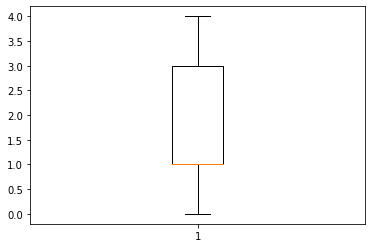

In [ ]:
plt.boxplot(datos2['gun_type'])
plt.show()

In [ ]:
n_guns_involved_v2 = datos2[ (datos2['n_guns_involved'] == 0)].index.astype(int)
datos2.drop(n_guns_involved_v2, inplace=True)
datos2['n_guns_involved']=(datos['n_guns_involved'].fillna(0)).astype(int)
datos2.loc[(datos2.n_guns_involved>=3),'n_guns_involved']=3;

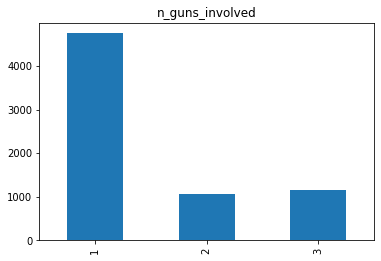

In [ ]:
#1 arma involucrada, 2 armas involucradas , 3 o mas armas
plot= datos2['n_guns_involved'].value_counts().sort_index(ascending=True).plot(kind='bar',title="n_guns_involved");
plt.show(plot)

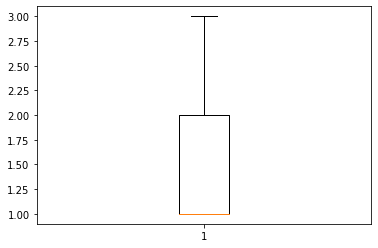

In [ ]:
plt.boxplot(datos2['n_guns_involved'])
plt.show()

In [ ]:
#0 mayores de edad (18) 1 menores edad
participant_age_group_v2 = datos2[ (datos2['participant_age_group'] == 7)].index.astype(int)
datos2.drop(participant_age_group_v2, inplace=True)
datos2['participant_age_group']=(datos['participant_age_group'].fillna(0)).astype(int)
datos2.loc[(datos2.participant_age_group==0)|(datos2.participant_age_group==4)|(datos2.participant_age_group==5),'participant_age_group']=0;
datos2.loc[(datos2.participant_age_group==1)|(datos2.participant_age_group==2)|(datos2.participant_age_group==3)|(datos2.participant_age_group==6),'participant_age_group']=1;



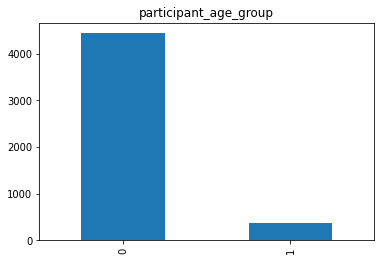

In [ ]:
plot= datos2['participant_age_group'].value_counts().sort_index(ascending=True).plot(kind='bar',title="participant_age_group");
plt.show(plot)

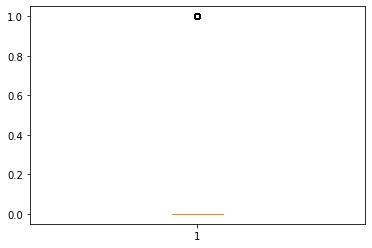

In [ ]:
plt.boxplot(datos2['participant_age_group'])
plt.show()

In [ ]:
datos2

,month,day,gun_stolen,gun_type,n_guns_involved,participant_age_group,participant_gender,avg_age,heridos,state2
54,4.0,7.0,0,4,2,0,2,4.0,1.0,0.0
95,6.0,5.0,0,4,2,0,2,4.0,1.0,2.0
207,9.0,2.0,1,1,2,0,1,4.0,1.0,2.0
1124,1.0,2.0,1,3,2,0,1,4.0,1.0,0.0
1136,1.0,2.0,0,1,1,0,1,4.0,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...
239298,3.0,4.0,1,1,1,0,1,0.0,0.0,1.0
239299,3.0,4.0,1,1,1,0,1,0.0,0.0,1.0
239314,3.0,4.0,1,2,1,0,1,2.0,0.0,3.0
239336,3.0,5.0,1,1,2,0,2,0.0,1.0,1.0


#**Defenición de target y variables independientes**


In [ ]:
datos3=datos2.copy()
datos3 = datos3.drop(['heridos'], axis=1) #Eliminar columnas correlacionales a global_sales
variables_independientes = datos3
variables_independientes

,month,day,gun_stolen,gun_type,n_guns_involved,participant_age_group,participant_gender,avg_age,state2
54,4.0,7.0,0,4,2,0,2,4.0,0.0
95,6.0,5.0,0,4,2,0,2,4.0,2.0
207,9.0,2.0,1,1,2,0,1,4.0,2.0
1124,1.0,2.0,1,3,2,0,1,4.0,0.0
1136,1.0,2.0,0,1,1,0,1,4.0,2.0
...,...,...,...,...,...,...,...,...,...
239298,3.0,4.0,1,1,1,0,1,0.0,1.0
239299,3.0,4.0,1,1,1,0,1,0.0,1.0
239314,3.0,4.0,1,2,1,0,1,2.0,3.0
239336,3.0,5.0,1,1,2,0,2,0.0,1.0


In [ ]:
variables_independientes.isnull().sum()

month                    0
day                      0
gun_stolen               0
gun_type                 0
n_guns_involved          0
participant_age_group    0
participant_gender       0
avg_age                  0
state2                   0
dtype: int64

In [ ]:
datos4=datos2.copy()
datos4 = datos4.drop(['month','day','state2','gun_stolen','gun_type','n_guns_involved','participant_age_group','participant_gender','avg_age'], axis=1) #Eliminar columnas correlacionales a global_sales
variables_objetivo = datos4
variables_objetivo

,heridos
54,1.0
95,1.0
207,1.0
1124,1.0
1136,1.0
...,...
239298,0.0
239299,0.0
239314,0.0
239336,1.0


In [ ]:
datos3.astype(int)
datos4.astype(int)

,heridos
54,1
95,1
207,1
1124,1
1136,1
...,...
239298,0
239299,0
239314,0
239336,1


#**Normalizaciones**

**Se debe escoger entre 1 de los 3 procesos a continuación, obviamente el que entregue mejores resultados**

**Rama 1, sin normalizar**

In [ ]:
X_std = variables_independientes.values
X_stdo = variables_objetivo.values

**Rama 2,Normalizado**

In [ ]:
#X_std = preprocessing.normalize(variables_independientes)
#X_stdo = preprocessing.normalize(variables_objetivo)

**Rama 3,MinMaxScaler**

In [ ]:
#X_std = preprocessing.minmax_scale(variables_independientes)
#X_stdo = preprocessing.minmax_scale(variables_objetivo)

**Rama 4,Scale**

In [ ]:
#X_std = preprocessing.scale(variables_independientes) # Se considera como la normalización con mejor resultado
#X_stdo = preprocessing.scale(variables_objetivo) # Se considera como la normalización con mejor resultado

# **Arboles de decisión**

**Arbol de decision Gini**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix

# Separamos en dos variables (X e Y)
X = datos3
Y = datos4['heridos']

# Separando los datos en sets de entrenamiento y evaluación
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2)

In [ ]:
# Importando el arbol de decisión
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

# Creando el modelo con criterio 'gini'
arbolGini = DecisionTreeClassifier(criterion='gini') 

# Ajustando el modelo
arbolGini.fit(X_train, y_train)

print('Precisión modelo inicial train/test  {0:.6f}/{1:.6f}'
      .format(arbolGini.score(X_train, y_train), arbolGini.score(X_test, y_test)))

Precisión modelo inicial train/test  0.964889/0.756757


In [ ]:
from sklearn.metrics import confusion_matrix

y_predicted_arbolGini = arbolGini.predict(X_test)
matrizC = confusion_matrix(y_test, y_predicted_arbolGini)
matrizC

array([[665, 108],
       [126,  63]])

Text(69.0, 0.5, 'Truth')

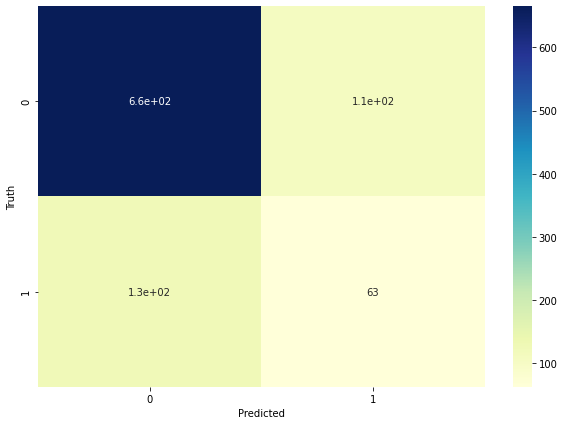

In [ ]:
import seaborn as sns

%matplotlib inline
plt.figure(figsize=(10,7))
sns.heatmap(matrizC, annot=True, cmap="YlGnBu")
plt.xlabel('Predicted')
plt.ylabel('Truth')

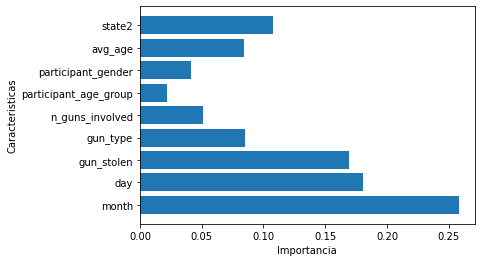

In [ ]:
caract = X.shape[1]
plt.barh(range(caract), arbolGini.feature_importances_)
plt.yticks(np.arange(caract), X.columns.values)
plt.xlabel('Importancia')
plt.ylabel('Caracteristicas')
plt.show()

**Arbol decision Cross Entropy**

In [ ]:
# Creando el modelo con criterio 'Entropy'
arbolEntropy = DecisionTreeClassifier(criterion='entropy') 
# Ajustando el modelo
arbolEntropy.fit(X_train, y_train) 
print('Precisión modelo inicial train/test  {0:.6f}/{1:.6f}'
      .format(arbolEntropy.score(X_train, y_train), arbolEntropy.score(X_test, y_test)))

Precisión modelo inicial train/test  0.964889/0.754678


In [ ]:
y_predicted_arbolEntropy = arbolEntropy.predict(X_test)
matrizC = confusion_matrix(y_test, y_predicted_arbolEntropy)
matrizC

array([[663, 110],
       [126,  63]])

Text(69.0, 0.5, 'Truth')

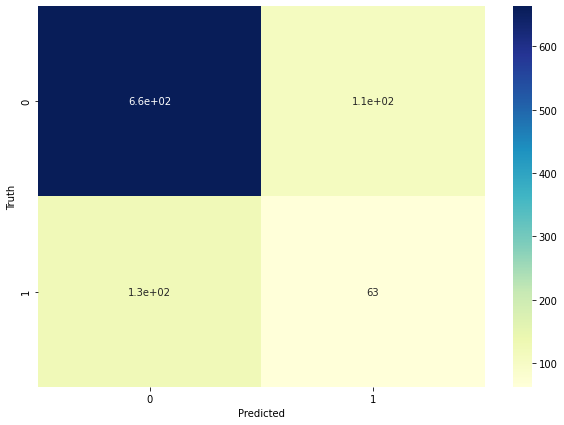

In [ ]:
%matplotlib inline
plt.figure(figsize=(10,7))
sns.heatmap(matrizC, annot=True, cmap="YlGnBu")
plt.xlabel('Predicted')
plt.ylabel('Truth')

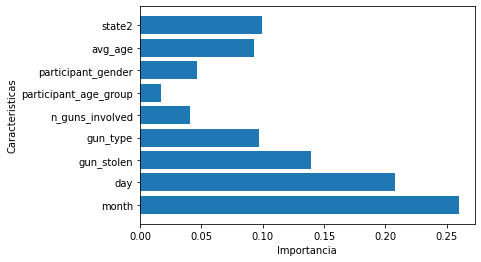

In [ ]:
caract = X.shape[1]
plt.barh(range(caract), arbolEntropy.feature_importances_)
plt.yticks(np.arange(caract), X.columns.values)
plt.xlabel('Importancia')
plt.ylabel('Caracteristicas')
plt.show()

**Random Forest**

In [ ]:
# Importando el random forest
from sklearn.ensemble import RandomForestClassifier

randomForest = RandomForestClassifier() # Creando el modelo
randomForest.fit(X_train, y_train) # Ajustando el modelo

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
print('Precisión modelo inicial train/test  {0:.6f}/{1:.6f}'
      .format(randomForest.score(X_train, y_train), randomForest.score(X_test, y_test)))

Precisión modelo inicial train/test  0.964889/0.793139


In [ ]:
y_predicted_randomForest = randomForest.predict(X_test)
matrizC = confusion_matrix(y_test, y_predicted_randomForest)
matrizC

array([[699,  74],
       [125,  64]])

Text(69.0, 0.5, 'Truth')

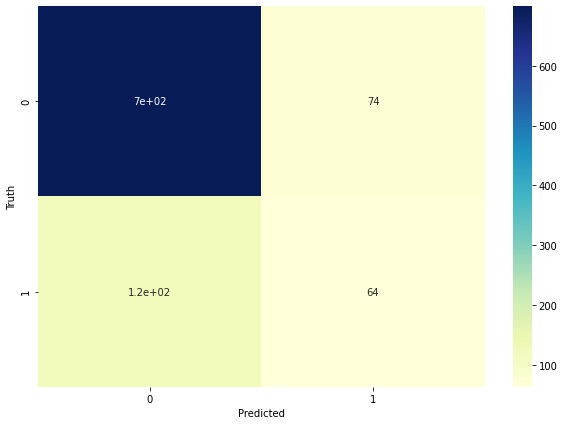

In [ ]:
%matplotlib inline
plt.figure(figsize=(10,7))
sns.heatmap(matrizC, annot=True, cmap="YlGnBu")
plt.xlabel('Predicted')
plt.ylabel('Truth')

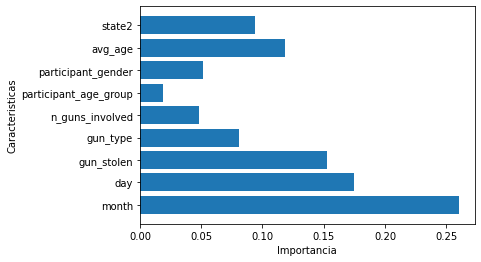

In [ ]:
caract = X.shape[1]
plt.barh(range(caract), randomForest.feature_importances_)
plt.yticks(np.arange(caract), X.columns.values)
plt.xlabel('Importancia')
plt.ylabel('Caracteristicas')
plt.show()

**AdaBoost**

In [ ]:
# Importando adaBoost
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import make_classification

# Utilizando AdaBoost
adaBoost = AdaBoostClassifier(n_estimators=500, 
                              learning_rate=1.5)
# Ajustando los datos
adaBoost = adaBoost.fit(X_train, y_train)

In [ ]:
print('Precisión modelo inicial train/test  {0:.6f}/{1:.6f}'
      .format(adaBoost.score(X_train, y_train), adaBoost.score(X_test, y_test)))

Precisión modelo inicial train/test  0.829129/0.829522


In [ ]:
y_predicted_adaBoost = adaBoost.predict(X_test)
matrizC = confusion_matrix(y_test, y_predicted_adaBoost)
matrizC

array([[734,  39],
       [125,  64]])

Text(69.0, 0.5, 'Truth')

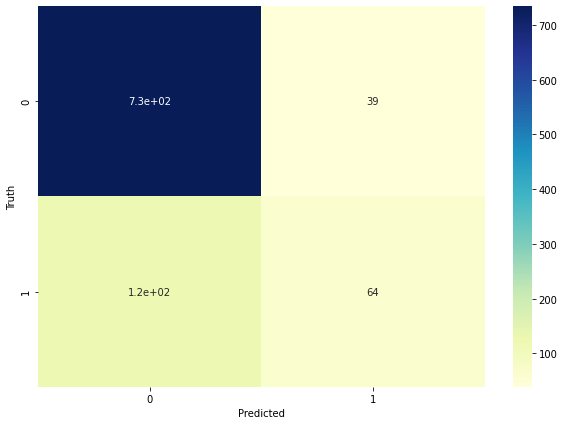

In [ ]:
%matplotlib inline
plt.figure(figsize=(10,7))
sns.heatmap(matrizC, annot=True, cmap="YlGnBu")
plt.xlabel('Predicted')
plt.ylabel('Truth')

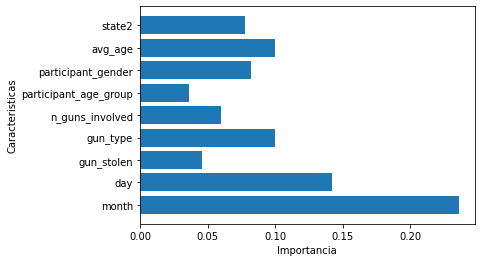

In [ ]:
caract = X.shape[1]
plt.barh(range(caract), adaBoost.feature_importances_)
plt.yticks(np.arange(caract), X.columns.values)
plt.xlabel('Importancia')
plt.ylabel('Caracteristicas')
plt.show()

**Gaussian Naive Bayes**

In [ ]:
# https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html?highlight=gaussiannb#sklearn.naive_bayes.GaussianNB

from sklearn.naive_bayes import GaussianNB

gNaiveBayes = GaussianNB()
gNaiveBayes.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
print('Precisión modelo inicial train/test  {0:.6f}/{1:.6f}'
      .format(gNaiveBayes.score(X_train, y_train), gNaiveBayes.score(X_test, y_test)))

Precisión modelo inicial train/test  0.811964/0.804574


In [ ]:
#Matriz de Confusión
y_predicted_gNaiveBayes = gNaiveBayes.predict(X_test)
matrizC = confusion_matrix(y_test, y_predicted_gNaiveBayes)
matrizC

array([[681,  92],
       [ 96,  93]])

Text(69.0, 0.5, 'Truth')

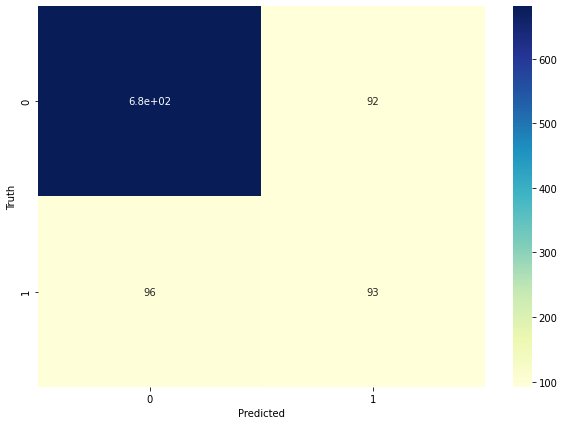

In [ ]:
%matplotlib inline
plt.figure(figsize=(10,7))
sns.heatmap(matrizC, annot=True, cmap="YlGnBu")
plt.xlabel('Predicted')
plt.ylabel('Truth')

#**Evaluación**

In [ ]:
from sklearn.model_selection import cross_val_score

score_arbolGini = cross_val_score(arbolGini, X, Y, cv=100)
scoreFinal_arbolGini = score_arbolGini.mean()*100
print(scoreFinal_arbolGini)

73.78954081632654


In [ ]:
score_arbolEntropy = cross_val_score(arbolEntropy, X, Y, cv=100)
scoreFinal_arbolEntropy = score_arbolEntropy.mean()*100
print(scoreFinal_arbolEntropy)

73.23044217687074


In [ ]:
score_randomForest = cross_val_score(randomForest, X, Y, cv=100)
scoreFinal_randomForest = score_randomForest.mean()*100
print(scoreFinal_randomForest)

78.74149659863944


In [ ]:
score_adaBoost = cross_val_score(adaBoost, X, Y, cv=100)
scoreFinal_adaBoost = score_adaBoost.mean()*100
print(scoreFinal_adaBoost)


81.63477891156464


In [ ]:
score_gNaiveBayes = cross_val_score(gNaiveBayes, X, Y, cv=100)
scoreFinal_gNaiveBayes = score_gNaiveBayes.mean()*100
print(scoreFinal_gNaiveBayes)

81.11607142857143


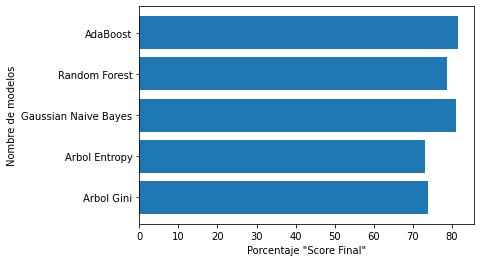

In [ ]:
import matplotlib.pyplot as plt

nombres = ['Arbol Gini','Arbol Entropy','Gaussian Naive Bayes','Random Forest','AdaBoost']
datos = [scoreFinal_arbolGini,scoreFinal_arbolEntropy,scoreFinal_gNaiveBayes,scoreFinal_randomForest,scoreFinal_adaBoost]
xx = range(len(datos))

plt.barh(xx, datos)
plt.yticks(xx, nombres)
plt.xlabel('Porcentaje "Score Final"')
plt.ylabel('Nombre de modelos')
plt.show()

#**Arboles con profundidad 3,5,6 (Arbol de decisión, AdaBoost)**

**Arbol profundidad 3**

In [ ]:
#se define el modelo del arbol de profundidad 3
modelo = DecisionTreeRegressor( 
            max_depth         = 3,
            random_state = 123
          )

In [ ]:
modelo.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=3,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=123, splitter='best')

Profundidad del árbol: 3
Número de nodos terminales: 8


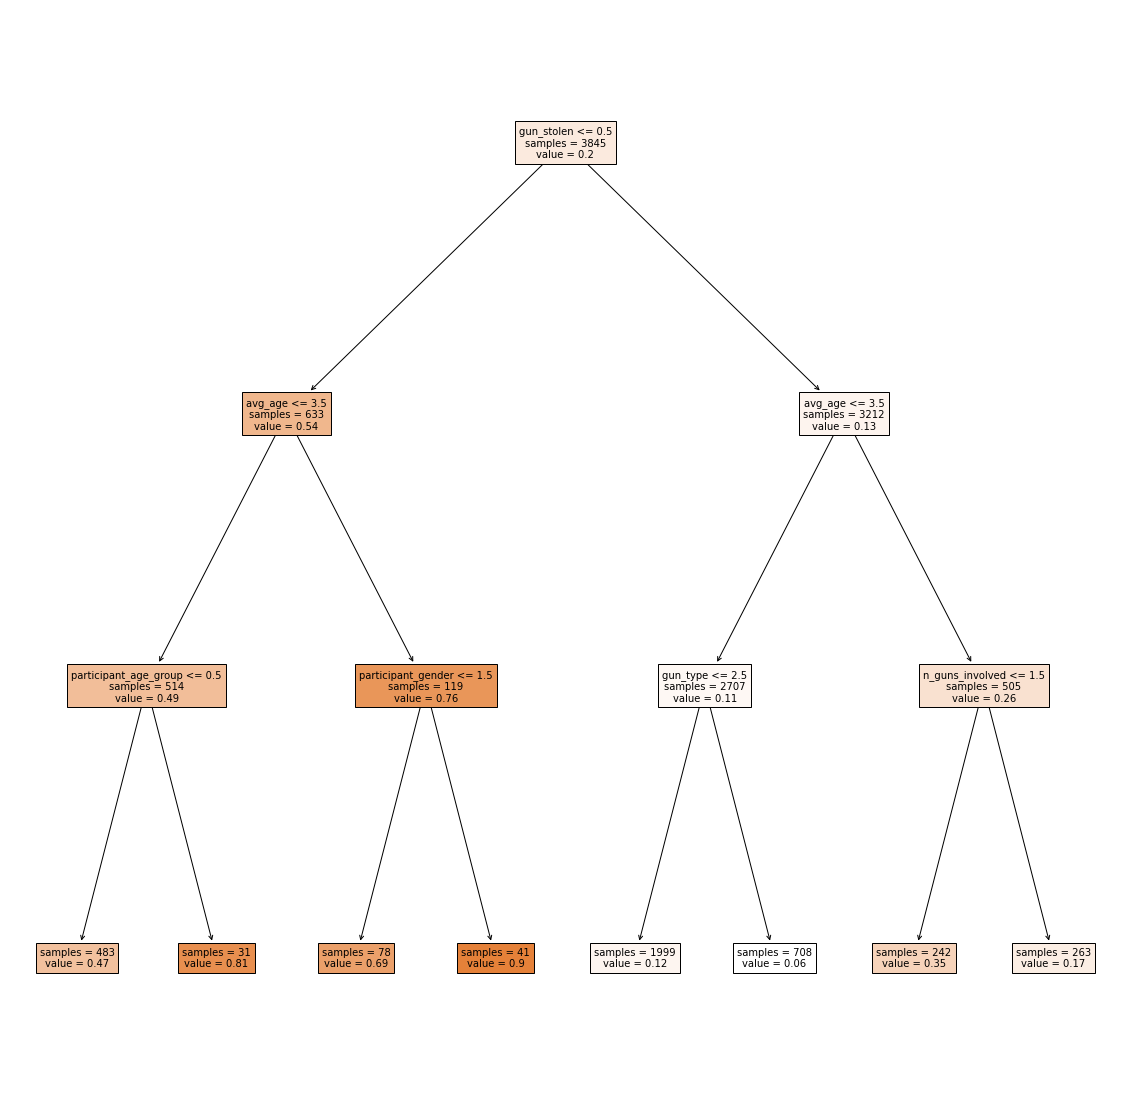

In [ ]:
#se grafica el arbol
fig, ax = plt.subplots(figsize=(20, 20))

print(f"Profundidad del árbol: {modelo.get_depth()}")
print(f"Número de nodos terminales: {modelo.get_n_leaves()}")

plot = plot_tree(
            decision_tree = modelo,
            feature_names = variables_independientes.columns,
            class_names   = 'Numero de muertes',
            filled        = True,
            impurity      = False,
            fontsize      = 10,
            precision     = 2,
            ax            = ax
       )

In [ ]:
texto_modelo = export_text(# se obtinen los textos del arbol
                    decision_tree = modelo,
                    feature_names = list(variables_independientes.columns)
               )
print(texto_modelo)

|--- gun_stolen <= 0.50
|   |--- avg_age <= 3.50
|   |   |--- participant_age_group <= 0.50
|   |   |   |--- value: [0.47]
|   |   |--- participant_age_group >  0.50
|   |   |   |--- value: [0.81]
|   |--- avg_age >  3.50
|   |   |--- participant_gender <= 1.50
|   |   |   |--- value: [0.69]
|   |   |--- participant_gender >  1.50
|   |   |   |--- value: [0.90]
|--- gun_stolen >  0.50
|   |--- avg_age <= 3.50
|   |   |--- gun_type <= 2.50
|   |   |   |--- value: [0.12]
|   |   |--- gun_type >  2.50
|   |   |   |--- value: [0.06]
|   |--- avg_age >  3.50
|   |   |--- n_guns_involved <= 1.50
|   |   |   |--- value: [0.35]
|   |   |--- n_guns_involved >  1.50
|   |   |   |--- value: [0.17]



In [ ]:
importancia_predictores = pd.DataFrame( # se obtiene la importancion de cada predictor utilizado en el arbol
                            {'predictor': variables_independientes.columns,
                             'importancia': modelo.feature_importances_}
                            )
print("Importancia de los predictores en el modelo")
print("-------------------------------------------")
importancia_predictores.sort_values('importancia', ascending=False)

Importancia de los predictores en el modelo
-------------------------------------------


,predictor,importancia
2,gun_stolen,0.762902
7,avg_age,0.145122
4,n_guns_involved,0.034649
5,participant_age_group,0.027941
3,gun_type,0.019332
6,participant_gender,0.010053
0,month,0.000000
1,day,0.000000
8,state2,0.000000


In [ ]:
predicciones = modelo.predict(X = X_test)

rmse = mean_squared_error(
        y_true  = y_test,
        y_pred  = predicciones,
        squared = False
       )
print(f"El error (rmse) de test es: {rmse}")

El error (rmse) de test es: 0.3592929693898291


In [ ]:
acc_decision_test = round(modelo.score(X_test, y_test) * 100, 2) #se obtiene la precision de los datos
print("precisión: ",acc_decision_test, "%")

precisión:  18.23 %


In [ ]:
acc_decision_train = round(modelo.score(X_train, y_train) * 100, 2) #se obtiene la precision de los datos
print("precisión: ",acc_decision_train, "%")

precisión:  19.4 %


**Arbol Profudidad 4**

In [ ]:
modelo4 = DecisionTreeRegressor(
            max_depth         = 4,
            random_state = 123
          )

In [ ]:
modelo4.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=4,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=123, splitter='best')

Profundidad del árbol: 4
Número de nodos terminales: 16


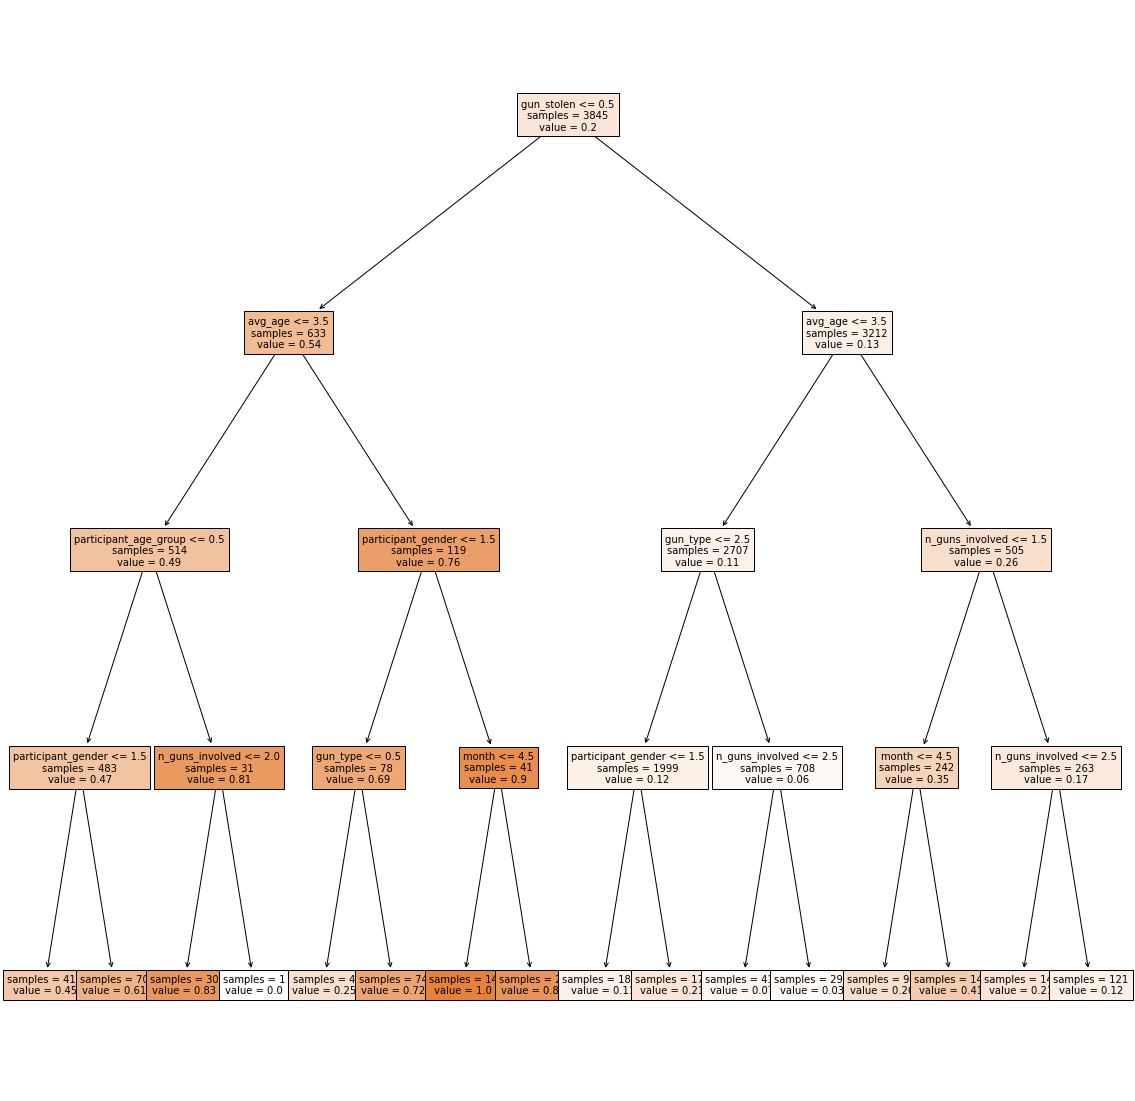

In [ ]:
fig, ax = plt.subplots(figsize=(20, 20))

print(f"Profundidad del árbol: {modelo4.get_depth()}")
print(f"Número de nodos terminales: {modelo4.get_n_leaves()}")

plot = plot_tree(
            decision_tree = modelo4,
            feature_names = variables_independientes.columns,
            class_names   = 'Numero de muertos',
            filled        = True,
            impurity      = False,
            fontsize      = 10,
            precision     = 2,
            ax            = ax
       )

In [ ]:
texto_modelo4 = export_text(
                    decision_tree = modelo4,
                    feature_names = list(variables_independientes.columns)
               )
print(texto_modelo4)

|--- gun_stolen <= 0.50
|   |--- avg_age <= 3.50
|   |   |--- participant_age_group <= 0.50
|   |   |   |--- participant_gender <= 1.50
|   |   |   |   |--- value: [0.45]
|   |   |   |--- participant_gender >  1.50
|   |   |   |   |--- value: [0.61]
|   |   |--- participant_age_group >  0.50
|   |   |   |--- n_guns_involved <= 2.00
|   |   |   |   |--- value: [0.83]
|   |   |   |--- n_guns_involved >  2.00
|   |   |   |   |--- value: [0.00]
|   |--- avg_age >  3.50
|   |   |--- participant_gender <= 1.50
|   |   |   |--- gun_type <= 0.50
|   |   |   |   |--- value: [0.25]
|   |   |   |--- gun_type >  0.50
|   |   |   |   |--- value: [0.72]
|   |   |--- participant_gender >  1.50
|   |   |   |--- month <= 4.50
|   |   |   |   |--- value: [1.00]
|   |   |   |--- month >  4.50
|   |   |   |   |--- value: [0.85]
|--- gun_stolen >  0.50
|   |--- avg_age <= 3.50
|   |   |--- gun_type <= 2.50
|   |   |   |--- participant_gender <= 1.50
|   |   |   |   |--- value: [0.11]
|   |   |   |--- parti

In [ ]:
importancia_predictores = pd.DataFrame(
                            {'predictor': variables_independientes.columns,
                             'importancia': modelo4.feature_importances_}
                            )
print("Importancia de los predictores en el modelo")
print("-------------------------------------------")
importancia_predictores.sort_values('importancia', ascending=False)

Importancia de los predictores en el modelo
-------------------------------------------


,predictor,importancia
2,gun_stolen,0.720189
7,avg_age,0.136997
4,n_guns_involved,0.044165
6,participant_gender,0.034497
5,participant_age_group,0.026377
3,gun_type,0.024847
0,month,0.012929
1,day,0.000000
8,state2,0.000000


In [ ]:
predicciones = modelo4.predict(X = X_test)

rmse = mean_squared_error(
        y_true  = y_test,
        y_pred  = predicciones,
        squared = False
       )
print(f"El error (rmse) de test es: {rmse}")

El error (rmse) de test es: 0.3582940334353116


In [ ]:
acc_decision_test = round(modelo4.score(X_test, y_test) * 100, 2) #se obtiene la precision de los datos
print("precisión: ",acc_decision_test, "%")

precisión:  18.68 %


In [ ]:
acc_decision_train = round(modelo4.score(X_train, y_train) * 100, 2) #se obtiene la precision de los datos
print("precisión: ",acc_decision_train, "%")

precisión:  20.55 %


**Arbol profundidad 5**

In [ ]:
modelo5 = DecisionTreeRegressor(
            max_depth         = 5,
            random_state = 123
          )

In [ ]:
modelo5.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=5,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=123, splitter='best')

Profundidad del árbol: 5
Número de nodos terminales: 30


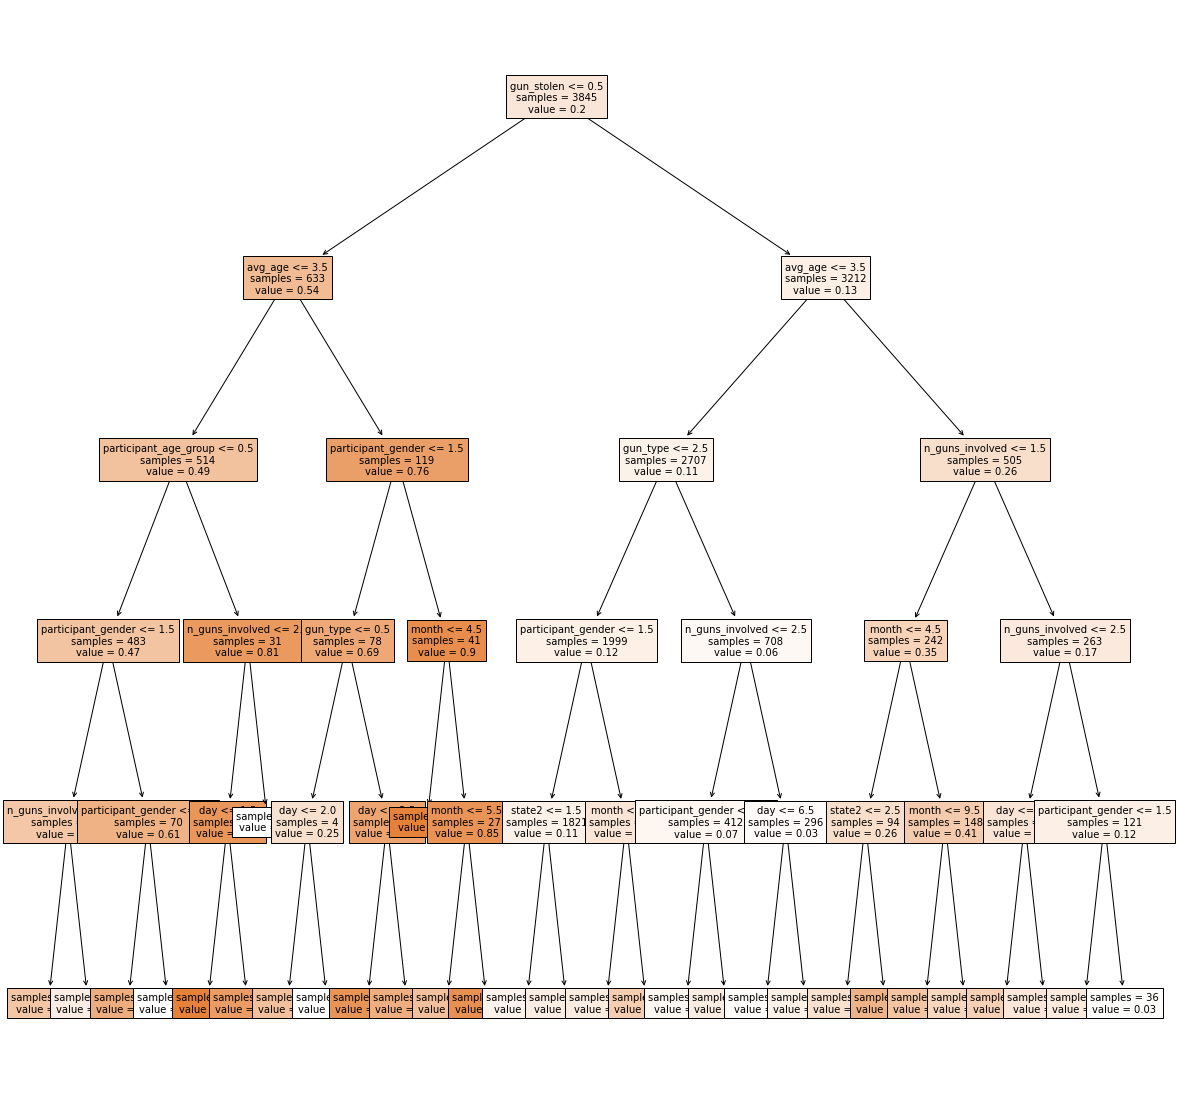

In [ ]:
fig, ax = plt.subplots(figsize=(20, 20))

print(f"Profundidad del árbol: {modelo5.get_depth()}")
print(f"Número de nodos terminales: {modelo5.get_n_leaves()}")

plot = plot_tree(
            decision_tree = modelo5,
            feature_names = variables_independientes.columns,
            class_names   = 'Numero de muertos',
            filled        = True,
            impurity      = False,
            fontsize      = 10,
            precision     = 2,
            ax            = ax
       )

In [ ]:
texto_modelo5 = export_text(
                    decision_tree = modelo5,
                    feature_names = list(variables_independientes.columns)
               )
print(texto_modelo5)

|--- gun_stolen <= 0.50
|   |--- avg_age <= 3.50
|   |   |--- participant_age_group <= 0.50
|   |   |   |--- participant_gender <= 1.50
|   |   |   |   |--- n_guns_involved <= 2.50
|   |   |   |   |   |--- value: [0.46]
|   |   |   |   |--- n_guns_involved >  2.50
|   |   |   |   |   |--- value: [0.14]
|   |   |   |--- participant_gender >  1.50
|   |   |   |   |--- participant_gender <= 2.50
|   |   |   |   |   |--- value: [0.65]
|   |   |   |   |--- participant_gender >  2.50
|   |   |   |   |   |--- value: [0.00]
|   |   |--- participant_age_group >  0.50
|   |   |   |--- n_guns_involved <= 2.00
|   |   |   |   |--- day <= 1.50
|   |   |   |   |   |--- value: [1.00]
|   |   |   |   |--- day >  1.50
|   |   |   |   |   |--- value: [0.78]
|   |   |   |--- n_guns_involved >  2.00
|   |   |   |   |--- value: [0.00]
|   |--- avg_age >  3.50
|   |   |--- participant_gender <= 1.50
|   |   |   |--- gun_type <= 0.50
|   |   |   |   |--- day <= 2.00
|   |   |   |   |   |--- value: [0.50]
|  

In [ ]:
importancia_predictores = pd.DataFrame(
                            {'predictor': variables_independientes.columns,
                             'importancia': modelo5.feature_importances_}
                            )
print("Importancia de los predictores en el modelo")
print("-------------------------------------------")
importancia_predictores.sort_values('importancia', ascending=False)

Importancia de los predictores en el modelo
-------------------------------------------


,predictor,importancia
2,gun_stolen,0.667448
7,avg_age,0.126965
4,n_guns_involved,0.050770
6,participant_gender,0.049308
0,month,0.032881
5,participant_age_group,0.024445
3,gun_type,0.023028
1,day,0.013837
8,state2,0.011320


In [ ]:
predicciones = modelo5.predict(X = X_test)

rmse = mean_squared_error(
        y_true  = y_test,
        y_pred  = predicciones,
        squared = False
       )
print(f"El error (rmse) de test es: {rmse}")

El error (rmse) de test es: 0.35981336752560455


In [ ]:
acc_decision_test = round(modelo5.score(X_test, y_test) * 100, 2) #se obtiene la precision de los datos
print("precisión: ",acc_decision_test, "%")

precisión:  17.99 %


In [ ]:
acc_decision_train = round(modelo5.score(X_train, y_train) * 100, 2) #se obtiene la precision de los datos
print("precisión: ",acc_decision_train, "%")

precisión:  22.17 %


**Profundidad 3 con Ada**

In [ ]:
#se utiliza adaboost para la mejora de la prediccion con un arbol de profundidad 4
regr_1 = AdaBoostRegressor(DecisionTreeRegressor(max_depth=3), 
                          n_estimators=300, random_state=123)

In [ ]:
regr_1.fit(X_train, y_train)

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(ccp_alpha=0.0,
                                                       criterion='mse',
                                                       max_depth=3,
                                                       max_features=None,
                                                       max_leaf_nodes=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=1,
                                                       min_samples_split=2,
                                                       min_weight_fraction_leaf=0.0,
                                                       presort='deprecated',
                                                       random_state=None,
                                                       splitter='best'),
                  

In [ ]:
importancia_predictores = pd.DataFrame(
                            {'predictor': variables_independientes.columns,
                             'importancia': regr_1.feature_importances_}
                            )
print("Importancia de los predictores en el modelo")
print("-------------------------------------------")
importancia_predictores.sort_values('importancia', ascending=False)

Importancia de los predictores en el modelo
-------------------------------------------


,predictor,importancia
2,gun_stolen,0.690996
7,avg_age,0.161384
4,n_guns_involved,0.053309
6,participant_gender,0.031699
5,participant_age_group,0.028953
3,gun_type,0.019042
8,state2,0.008597
1,day,0.006020
0,month,0.000000


In [ ]:
predicciones = regr_1.predict(X = X_test)

rmse = mean_squared_error(
        y_true  = y_test,
        y_pred  = predicciones,
        squared = False
       )
print(f"El error (rmse) de test es: {rmse}")

El error (rmse) de test es: 0.3600981625051588


In [ ]:
acc_decision_test = round(regr_1.score(X_test, y_test) * 100, 2) #se obtiene la precision de los datos
print("precisión: ",acc_decision_test, "%")

precisión:  17.86 %


In [ ]:
acc_decision_train = round(regr_1.score(X_train, y_train) * 100, 2) #se obtiene la precision de los datos
print("precisión: ",acc_decision_train, "%")

precisión:  19.19 %


**Profundidad 4 con Ada**

In [ ]:
#se utiliza adaboost para la mejora de la prediccion con un arbol de profundidad 4
regr_2 = AdaBoostRegressor(DecisionTreeRegressor(max_depth=4), 
                          n_estimators=300, random_state=123)


In [ ]:
regr_2.fit(X_train, y_train)

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(ccp_alpha=0.0,
                                                       criterion='mse',
                                                       max_depth=4,
                                                       max_features=None,
                                                       max_leaf_nodes=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=1,
                                                       min_samples_split=2,
                                                       min_weight_fraction_leaf=0.0,
                                                       presort='deprecated',
                                                       random_state=None,
                                                       splitter='best'),
                  

In [ ]:
importancia_predictores = pd.DataFrame(
                            {'predictor': variables_independientes.columns,
                             'importancia': regr_2.feature_importances_}
                            )
print("Importancia de los predictores en el modelo")
print("-------------------------------------------")
importancia_predictores.sort_values('importancia', ascending=False)

Importancia de los predictores en el modelo
-------------------------------------------


,predictor,importancia
2,gun_stolen,0.504550
7,avg_age,0.155051
3,gun_type,0.068972
6,participant_gender,0.066274
4,n_guns_involved,0.056919
0,month,0.043493
8,state2,0.041767
1,day,0.039858
5,participant_age_group,0.023118


In [ ]:
predicciones = regr_2.predict(X = X_test)

rmse = mean_squared_error(
        y_true  = y_test,
        y_pred  = predicciones,
        squared = False
       )
print(f"El error (rmse) de test es: {rmse}")

El error (rmse) de test es: 0.37037849528414907


In [ ]:
acc_decision_test = round(regr_2.score(X_test, y_test) * 100, 2) #se obtiene la precision de los datos
print("precisión: ",acc_decision_test, "%")

precisión:  13.1 %


In [ ]:
acc_decision_train = round(regr_2.score(X_train, y_train) * 100, 2) #se obtiene la precision de los datos
print("precisión: ",acc_decision_train, "%")

precisión:  16.62 %


**Profundidad 5 con Ada**

In [ ]:
#se utiliza adaboost para la mejora de la prediccion con un arbol de profundidad 4
regr_3 = AdaBoostRegressor(DecisionTreeRegressor(max_depth=5), 
                          n_estimators=300, random_state=123)

In [ ]:
regr_3.fit(X_train, y_train)

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(ccp_alpha=0.0,
                                                       criterion='mse',
                                                       max_depth=5,
                                                       max_features=None,
                                                       max_leaf_nodes=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=1,
                                                       min_samples_split=2,
                                                       min_weight_fraction_leaf=0.0,
                                                       presort='deprecated',
                                                       random_state=None,
                                                       splitter='best'),
                  

In [ ]:
importancia_predictores = pd.DataFrame(
                            {'predictor': variables_independientes.columns,
                             'importancia': regr_3.feature_importances_}
                            )
print("Importancia de los predictores en el modelo")
print("-------------------------------------------")
importancia_predictores.sort_values('importancia', ascending=False)

Importancia de los predictores en el modelo
-------------------------------------------


,predictor,importancia
2,gun_stolen,0.388579
7,avg_age,0.149049
0,month,0.087494
6,participant_gender,0.082445
8,state2,0.080759
3,gun_type,0.079300
1,day,0.060573
4,n_guns_involved,0.047929
5,participant_age_group,0.023872


In [ ]:
predicciones = regr_3.predict(X = X_test)

rmse = mean_squared_error(
        y_true  = y_test,
        y_pred  = predicciones,
        squared = False
       )
print(f"El error (rmse) de test es: {rmse}")

El error (rmse) de test es: 0.3807134133463782


In [ ]:
acc_decision_test = round(regr_3.score(X_test, y_test) * 100, 2) #se obtiene la precision de los datos
print("precisión: ",acc_decision_test, "%")

precisión:  8.19 %


In [ ]:
acc_decision_train = round(regr_3.score(X_train, y_train) * 100, 2) #se obtiene la precision de los datos
print("precisión: ",acc_decision_train, "%")

precisión:  16.89 %


#**SVM**


**kernel RBF**

In [ ]:
# Kernel RBF
SVM_2 = svm.SVR(kernel='rbf')
SVM_2.fit(X_train, y_train)
prediccion =SVM_2.predict(X_test)
precision_SVM2 = cross_val_score(SVM_2,X_test,y_test,cv=3)
print('Precisión Kernel RBF: ', precision_SVM2)
print( precision_SVM2.mean())

Precisión Kernel RBF:  [0.04509319 0.10791678 0.04490886]
0.06597294317085174


In [ ]:
predicciones = SVM_2.predict(X_test)

rmse = mean_squared_error(
        y_true  = y_test,
        y_pred  = predicciones,
        squared = False
       )
print(f"El error (rmse) de test es: {rmse}")

El error (rmse) de test es: 0.37661318364345064


**kernel poly**

In [ ]:
# Kernel poly
SVM_3 = svm.SVR(kernel='poly')
SVM_3.fit(X_train, y_train)
prediccion =SVM_3.predict(X_test)
precision_SVM3 = cross_val_score(SVM_3,X_test,y_test,cv=3)
print('Precisión Kernel poly: ', precision_SVM3)
print( precision_SVM3.mean())

Precisión Kernel poly:  [-0.02157699  0.09473608  0.06044903]
0.04453603973790843


In [ ]:
predicciones = SVM_3.predict(X_test)

rmse = mean_squared_error(
        y_true  = y_test,
        y_pred  = predicciones,
        squared = False
       )
print(f"El error (rmse) de test es: {rmse}")

El error (rmse) de test es: 0.3703009067956148


**kernel linear**

In [ ]:
# Kernel liner
SVM_4 = svm.SVR(kernel='linear')
SVM_4.fit(X_train, y_train)
prediccion =SVM_4.predict(X_test)
precision_SVM4 = cross_val_score(SVM_4,X_test,y_test,cv=3)
print('Precisión Kernel linear: ', precision_SVM4)
print( precision_SVM4.mean())

Precisión Kernel linear:  [-0.04269014 -0.02692352 -0.00048633]
-0.02336666093319188


In [ ]:
predicciones = SVM_4.predict(X_test)

rmse = mean_squared_error(
        y_true  = y_test,
        y_pred  = predicciones,
        squared = False
       )
print(f"El error (rmse) de test es: {rmse}")

El error (rmse) de test es: 0.4016119147948386


#**Redes bayesianas**

In [ ]:
X_trains, X_tests, y_trains, y_tests = train_test_split(variables_independientes, variables_objetivo['heridos'], test_size = 0.3)

In [ ]:
clf_bayes = GaussianNB() #Definición del algoritmo
clf_bayes.fit(X_trains, y_trains) #Entrenamiento del algoritmo
Y_predicts = clf_bayes.predict(X_tests) #Predicción del target en base a los datos de prueba

In [ ]:
rmse = mean_squared_error(y_tests,Y_predicts)
print("El error (rmse) de test es: ", rmse)

El error (rmse) de test es:  0.1787941787941788


In [ ]:
#Calculo de la precisión del modelo
from sklearn.metrics import precision_score
from sklearn import metrics
precision_bayes = precision_score(y_tests, Y_predicts, average = 'micro')
print('Precisión del Modelo: ', precision_bayes)

Precisión del Modelo:  0.8212058212058212


In [ ]:
# Matriz de Confusión para Clasificador Bayessiano
matriz_bayes = metrics.confusion_matrix(y_tests, Y_predicts)
print('Matriz de Confusión Clasificador Bayessiano: ')
print(matriz_bayes)

Matriz de Confusión Clasificador Bayessiano: 
[[1043  109]
 [ 149  142]]


Text(69.0, 0.5, 'Truth')

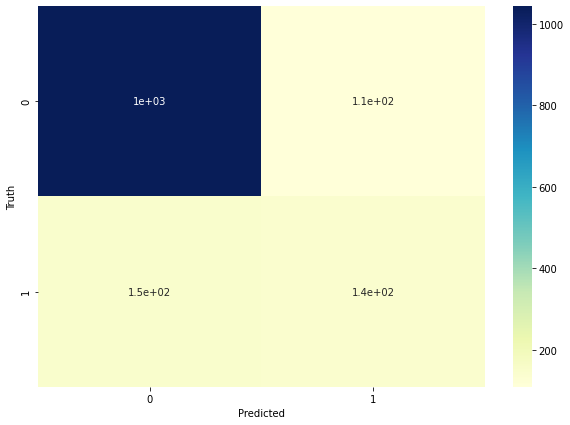

In [ ]:
import seaborn as sns

%matplotlib inline
plt.figure(figsize=(10,7))
sns.heatmap(matriz_bayes, annot=True, cmap="YlGnBu")
plt.xlabel('Predicted')
plt.ylabel('Truth')

#**Validacion cruzada**

In [ ]:
## Funciones
def precision(cf,i,t):
    if(t == 0): txt = '- all'
    else: txt = ' - test'
    p_noheridos = round(float(cf[0][0])*100/cf[0].sum(),2)
    p_heridos = round(float(cf[1][1])*100/cf[1].sum(),2)
    p_modelo = round(float(cf[0][0]+cf[1][1])*100/cf.sum(),2)
    return [p_noheridos, p_heridos, p_modelo]

def valida_global(model,k):
  col_train = ['month', 'day', 'state2', 'avg_age', 'participant_gender', 'n_guns_involved', 'gun_type', 'gun_stolen']
  p_noheridos_all = [];p_noheridos_test = [];p_heridos_all = [];p_heridos_test = [];p_all = [];p_test = [];
  for i in range(k):
      tmp_train, tmp_test = train_test_split(datos2, test_size = 0.5)
      tmp_train_target = tmp_train[['heridos']].values
      tmp_test_target = tmp_test[['heridos']].values
      tmp_train = tmp_train[col_train].values
      tmp_test = tmp_test[col_train].values
      modelo = model.fit(tmp_train, tmp_train_target.ravel())
      tmp_train_pred = modelo.predict(tmp_train)
      cf_train = confusion_matrix(tmp_train_target, tmp_train_pred)
      [p_noheridos, p_heridos, p_modelo] = precision(cf_train,i,0)
      p_noheridos_all.append(p_noheridos)
      p_heridos_all.append(p_heridos)
      p_all.append(p_modelo)
      tmp_test_pred = modelo.predict(tmp_test)
      cf_test = confusion_matrix(tmp_test_target, tmp_test_pred)
      [p_noheridos, p_heridos, p_modelo] = precision(cf_test,i,1)
      p_noheridos_test.append(p_noheridos)
      p_heridos_test.append(p_heridos)
      p_test.append(p_modelo)
    # Precision Global
  print("Acierto para No heridos:")
  print("All - ",round(np.array(p_noheridos_all).mean(),2))
  print("Test - ",round(np.array(p_noheridos_test).mean(),2))
  print("Acierto para Heridos:")
  print("All - ",round(np.array(p_heridos_all).mean(),2))
  print("Test - ",round(np.array(p_heridos_test).mean(),2))
  print("Acierto para Modelo:")
  print("All - ",round(np.array(p_all).mean(),2))
  print("Test - ",round(np.array(p_test).mean(),2))

*Validación Cruzada con Arbol de Decision con Indice de Gini*

In [ ]:
valida_global(arbolGini,50)

Acierto para No heridos:
All -  99.91
Test -  84.05
Acierto para Heridos:
All -  86.51
Test -  35.01
Acierto para Modelo:
All -  97.26
Test -  74.42


*Validación Cruzada con Random Forest*

In [ ]:
valida_global(randomForest,10)

Acierto para No heridos:
All -  99.36
Test -  91.7
Acierto para Heridos:
All -  89.2
Test -  31.2
Acierto para Modelo:
All -  97.37
Test -  79.75


*Validación Cruzada con Redes*

In [ ]:
valida_global(clf_bayes,20)

Acierto para No heridos:
All -  90.2
Test -  89.99
Acierto para Heridos:
All -  45.75
Test -  45.37
Acierto para Modelo:
All -  81.43
Test -  81.21


*Validación Cruzada con Arbol de Decision de Entropia Cruzada*

In [ ]:
valida_global(arbolEntropy,20)

Acierto para No heridos:
All -  99.89
Test -  84.36
Acierto para Heridos:
All -  86.84
Test -  34.27
Acierto para Modelo:
All -  97.34
Test -  74.38


*Validación Cruzada con Adaboost*

In [ ]:
valida_global(adaBoost,20)

Acierto para No heridos:
All -  95.32
Test -  95.24
Acierto para Heridos:
All -  32.86
Test -  30.76
Acierto para Modelo:
All -  82.99
Test -  82.56


*Validación Cruzada con Bayesiano Ingenuo*

In [ ]:
valida_global(gNaiveBayes,20)

Acierto para No heridos:
All -  90.27
Test -  90.03
Acierto para Heridos:
All -  46.16
Test -  44.72
Acierto para Modelo:
All -  81.63
Test -  81.06
